In [1]:
from massimal.hyspec_io import load_envi_image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.decomposition import PCA

In [2]:
# Paths
spec_dir = Path('M:\\PosterGeoHab2024\\vega_sola\\hyperspec\\spectra')
fig_dir = Path("C:\\Users\\mha114\\Dropbox\\UiT\\Massimal\\Konferanser\\GEOHAB2024\\Figures\\plots")
header_files = sorted([file for file in spec_dir.rglob('*.hdr')])

In [3]:
# Parameters
wl_min = 400
wl_max = 730 #700 #750 

class_names = ['Sand','Bedrock','Maerl','Rockweed','Kelp','Chorda','BrownAlgae']
rgb_mod_wl = [640,570,500]

In [4]:
# Open all spectra, save as array
X = []
X_labels = []
for file in header_files:
    spectrum, wl, rgb_ind_orig, metadata = load_envi_image(file)
    X.append(np.squeeze(spectrum))
    X_labels.append(metadata['label'])
X = np.array(X)

wl_ind = (wl>= wl_min) & (wl <= wl_max)
wl = wl[wl_ind]
X = X[:,wl_ind]

In [5]:
# Create label vector
y = np.zeros(X.shape[0])
y_name = dict()
for i,class_name in enumerate(class_names):
    class_index = [class_name in label for label in X_labels]
    y[class_index] = i+1
    y_name[i+1] = class_name
print(y)
print(y_name)

[2. 2. 2. 2. 2. 7. 7. 7. 7. 7. 7. 7. 6. 6. 6. 6. 0. 5. 5. 5. 5. 5. 5. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
{1: 'Sand', 2: 'Bedrock', 3: 'Maerl', 4: 'Rockweed', 5: 'Kelp', 6: 'Chorda', 7: 'BrownAlgae'}


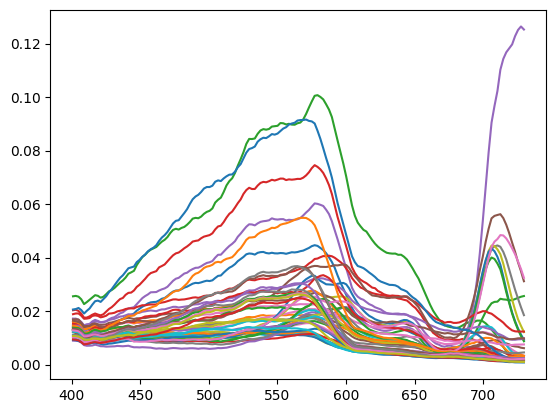

In [6]:
# Show all spectra
plt.plot(wl,X.T)
plt.show()

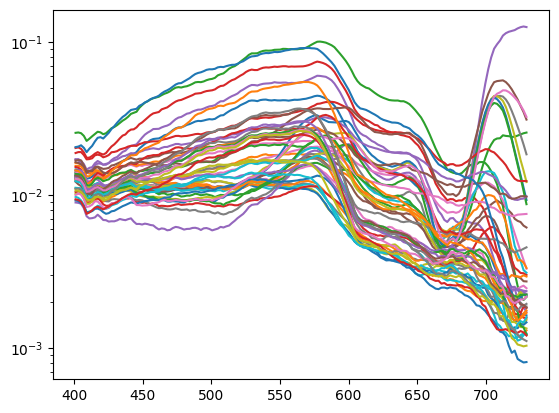

In [7]:
# Show all spectra on log scale
plt.semilogy(wl,X.T)
plt.show()

In [8]:
# Find RGB percentiles
rgb_ind = tuple([np.argmin(np.abs(wl-rgb_wl)) for rgb_wl in rgb_mod_wl])
rgb_percentiles = np.percentile(X[:,rgb_ind],(2,98),axis=0)
print(f'{rgb_ind=}')
print(f'{rgb_percentiles}')

rgb_ind=(116, 83, 49)
[[0.00350862 0.01105549 0.00761412]
 [0.02872231 0.09168509 0.05784234]]


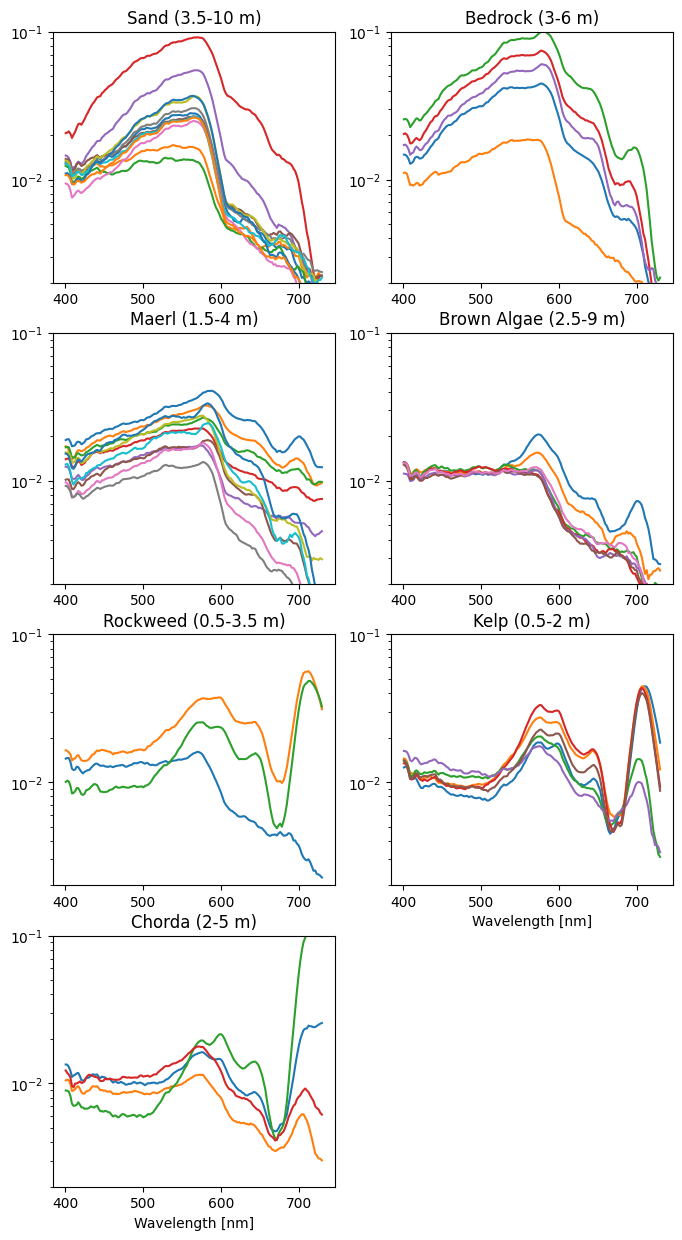

In [19]:
# Plot spectra grouped by class
classes = ['Sand','Bedrock','Maerl','BrownAlgae','Rockweed','Kelp','Chorda']
plot_titles = ['Sand (3.5-10 m)','Bedrock (3-6 m)','Maerl (1.5-4 m)', 'Brown Algae (2.5-9 m)',
               'Rockweed (0.5-3.5 m)','Kelp (0.5-2 m)','Chorda (2-5 m)']
# fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(15,7))
# for i,classname in enumerate(classes):
#     class_index = [classname in label for label in X_labels]
#     col = i % 4
#     row = i // 4
#     ax[row][col].semilogy(wl,X[class_index].T)
#     ax[row][col].set_ylim([0.002,0.1])
#     ax[row][col].set_title(plot_titles[i])
# ax[1][3].set_visible(False)
# ax[0][3].set_xlabel('Wavelength [nm]')
# ax[1][0].set_xlabel('Wavelength [nm]')
# ax[1][1].set_xlabel('Wavelength [nm]')
# ax[1][2].set_xlabel('Wavelength [nm]')

fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(8,15))
for i,classname in enumerate(classes):
    class_index = [classname in label for label in X_labels]
    col = i % 2
    row = i // 2
    ax[row][col].semilogy(wl,X[class_index].T)
    ax[row][col].set_ylim([0.002,0.1])
    ax[row][col].set_title(plot_titles[i])
ax[3][1].set_visible(False)
ax[2][1].set_xlabel('Wavelength [nm]')
ax[3][0].set_xlabel('Wavelength [nm]')

plt.savefig(fig_dir / 'Rrs_examples_per_class_log_plot.png',dpi=300,
                bbox_inches='tight',
                transparent=True)
plt.show()


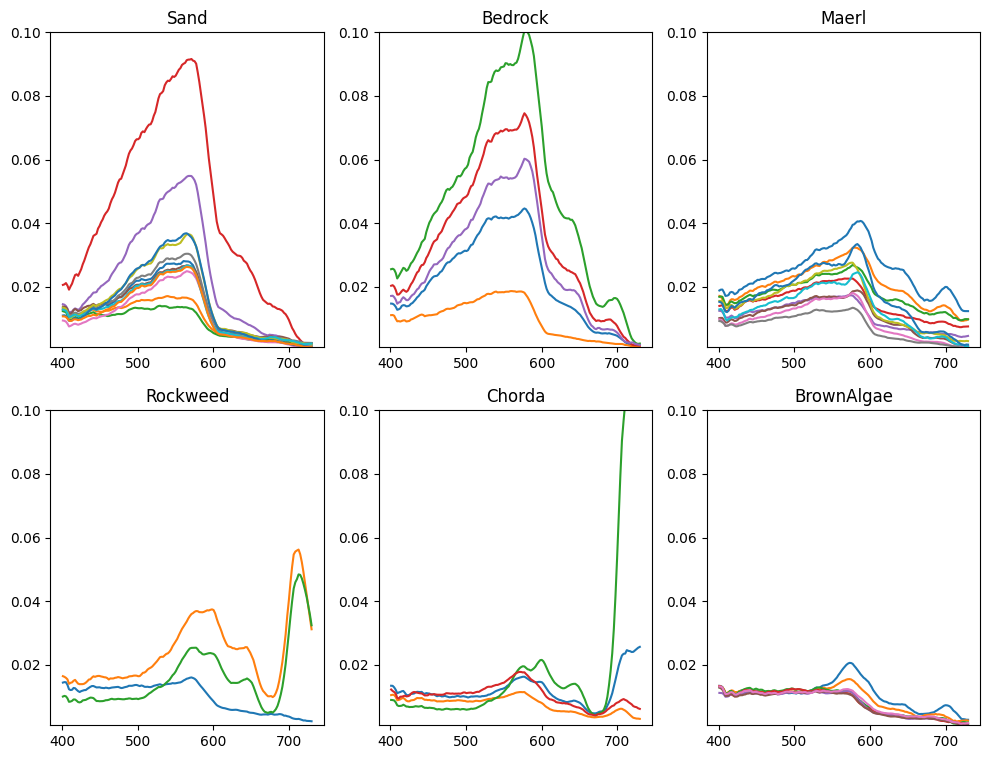

In [10]:
# Plot spectra grouped by class (linear)
classes = ['Sand','Bedrock','Maerl','Rockweed','Chorda','BrownAlgae']
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,9))
for i,classname in enumerate(classes):
    class_index = [classname in label for label in X_labels]
    col = i % 3
    row = i // 3
    ax[row][col].plot(wl,X[class_index].T)
    ax[row][col].set_ylim([0.001,0.1])
    ax[row][col].set_title(classname)
plt.show()

In [11]:
pca = PCA(n_components=8)
spec_pca = pca.fit_transform(X)

In [12]:
# plt.plot(pca.explained_variance_ratio_)
# plt.show()

In [13]:
pca_log = PCA(n_components=8)
spec_pca_log = pca_log.fit_transform(np.log(X))

[57.05 37.88 2.44 1.65 0.53 0.17 0.09 0.04] %


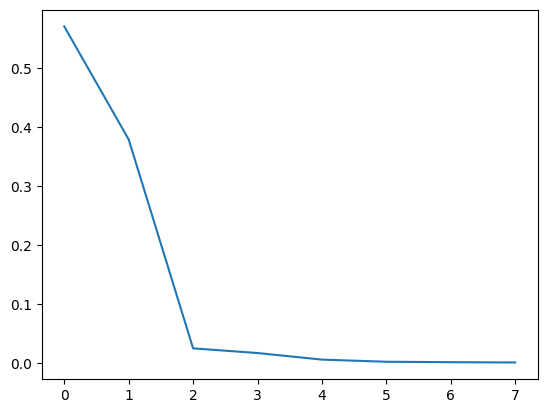

In [14]:
print(np.array2string(pca_log.explained_variance_ratio_*100,formatter={'float': lambda x: f'{x:.2f}'}) + ' %')
plt.plot(pca_log.explained_variance_ratio_)
plt.show()

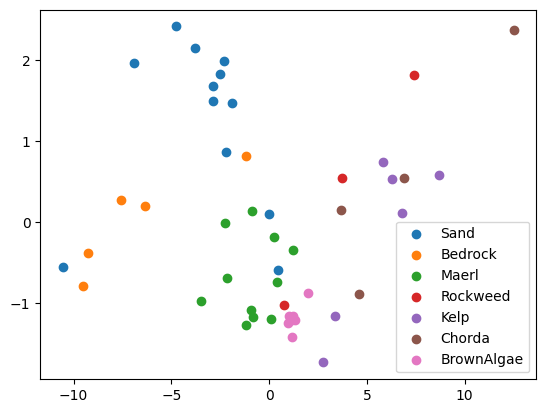

In [15]:
# Scatter plot of PCA components based on logarithmic spectra
plt.figure()
for i in y_name:
    y_ind = (y==i)
    plt.gca().scatter(spec_pca_log[y_ind,1],spec_pca_log[y_ind,2],label=y_name[i])
plt.legend()
plt.show()

In [16]:
# plt.figure()
# for i in y_name:
#     y_ind = (y==i)
#     plt.gca().scatter(spec_pca[y_ind,1],spec_pca[y_ind,2],label=y_name[i])
# plt.legend()
# plt.show()

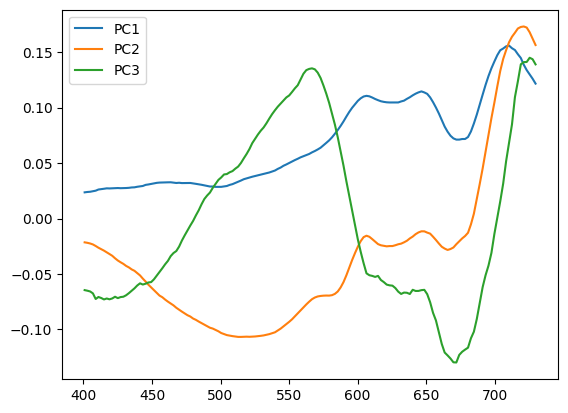

In [17]:
# Show first PCA components
for i in range(3):
    plt.plot(wl,pca_log.components_[i],label=f'PC{i+1}')
plt.legend()
plt.show()

In [18]:
np.count_nonzero(wl_ind)

159